In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


from api_keys import weather_api_key


from citipy import citipy


cities = '/Users/anthonygarcia/Desktop/Weather/cities.csv'


lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)


len(cities)

635

In [3]:
city_df = pd.DataFrame({'City':cities,'Lat':"" ,'Lng':"" ,'Max Temp':"" ,'Humidity':"" ,'Cloudiness':"" , 'Wind Speed':"" , 'Country':"" , 'Date':"" ,})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,,,,,,,,
1,lashio,,,,,,,,
2,henties bay,,,,,,,,
3,grand river south east,,,,,,,,
4,erzin,,,,,,,,
...,...,...,...,...,...,...,...,...,...
630,raudeberg,,,,,,,,
631,dzhankoy,,,,,,,,
632,vangaindrano,,,,,,,,
633,andenes,,,,,,,,


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key +'&q='

In [5]:
city_df = pd.DataFrame({'City':cities,'Lat':"" ,'Lng':"" ,'Max Temp':"" ,'Humidity':"" ,'Cloudiness':"" , 'Wind Speed':"" , 'Country':"" , 'Date':"" ,})
city_df


for index, row in city_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    
    
    
    try:
        city_df.loc[index,"Max Temp"]=city_weather['main']['temp']
        city_df.loc[index,"Humidity"]=city_weather['main']['humidity']
        city_df.loc[index,"Cloudiness"]=city_weather['clouds']['all']
        city_df.loc[index,"Wind Speed"]=city_weather['wind']['speed']
        city_df.loc[index,"Lat"]=city_weather['coord']['lat']
        city_df.loc[index,"Lng"]=city_weather["coord"]['lon']
        city_df.loc[index,"Country"]=city_weather['sys']['country']
        city_df.loc[index,"Date"]=city_weather['dt']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(city_df)

Processing Record 0 | norman wells
Processing Record 1 | lashio
Processing Record 2 | henties bay
Processing Record 3 | grand river south east
City not found... skipping.
Processing Record 4 | erzin
Processing Record 5 | egvekinot
Processing Record 6 | muros
Processing Record 7 | malwan
City not found... skipping.
Processing Record 8 | albany
Processing Record 9 | ushuaia
Processing Record 10 | chuy
Processing Record 11 | bredasdorp
Processing Record 12 | khatanga
Processing Record 13 | nakatsu
Processing Record 14 | hermanus
Processing Record 15 | yellowknife
Processing Record 16 | pangnirtung
Processing Record 17 | rodrigues alves
Processing Record 18 | samusu
City not found... skipping.
Processing Record 19 | yola
Processing Record 20 | adrar
Processing Record 21 | hilo
Processing Record 22 | belushya guba
City not found... skipping.
Processing Record 23 | port hedland
Processing Record 24 | diffa
Processing Record 25 | sakakah
Processing Record 26 | busselton
Processing Record 27 |

Processing Record 227 | taoudenni
Processing Record 228 | grindavik
Processing Record 229 | halalo
City not found... skipping.
Processing Record 230 | kachiry
Processing Record 231 | manggar
Processing Record 232 | mandera
Processing Record 233 | demba
Processing Record 234 | victoria
Processing Record 235 | fairbanks
Processing Record 236 | adre
Processing Record 237 | half moon bay
Processing Record 238 | chegdomyn
Processing Record 239 | sinnamary
Processing Record 240 | peace river
Processing Record 241 | itaituba
Processing Record 242 | adzope
Processing Record 243 | tonstad
Processing Record 244 | cabo san lucas
Processing Record 245 | marawi
Processing Record 246 | kargasok
Processing Record 247 | dikson
Processing Record 248 | san rafael
Processing Record 249 | bobo dioulasso
Processing Record 250 | sidi bin nur
Processing Record 251 | aras
Processing Record 252 | grand centre
City not found... skipping.
Processing Record 253 | abu samrah
Processing Record 254 | nemuro
Processi

Processing Record 459 | la ronge
Processing Record 460 | gornopravdinsk
Processing Record 461 | nordhorn
Processing Record 462 | maniitsoq
Processing Record 463 | sehithwa
Processing Record 464 | outjo
Processing Record 465 | bukama
Processing Record 466 | shagonar
Processing Record 467 | lamar
Processing Record 468 | karauzyak
City not found... skipping.
Processing Record 469 | kikwit
Processing Record 470 | codrington
Processing Record 471 | kilindoni
Processing Record 472 | bud
Processing Record 473 | nuuk
Processing Record 474 | oxapampa
Processing Record 475 | araouane
Processing Record 476 | quedlinburg
Processing Record 477 | dukat
Processing Record 478 | tubruq
City not found... skipping.
Processing Record 479 | yarada
Processing Record 480 | dinsor
City not found... skipping.
Processing Record 481 | afmadu
City not found... skipping.
Processing Record 482 | omsukchan
Processing Record 483 | den helder
Processing Record 484 | cayenne
Processing Record 485 | okandja
City not fou

In [6]:
city_df.to_csv('City_data.csv')



In [7]:
city = '/Users/anthonygarcia/Desktop/Weather/City_data.csv'

city_ = pd.read_csv(city, index_col=[0])
city_

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,85.77,69.0,71.0,16.17,MV,1.651332e+09
1,ilulissat,69.2167,-51.1000,23.02,42.0,20.0,9.22,GL,1.651332e+09
2,hobart,-42.8794,147.3294,54.34,88.0,75.0,11.50,AU,1.651332e+09
3,bluff,-46.6000,168.3333,57.22,73.0,84.0,19.95,NZ,1.651332e+09
4,butaritari,3.0707,172.7902,80.62,82.0,90.0,12.03,KI,1.651332e+09
...,...,...,...,...,...,...,...,...,...
621,ringkobing,56.0901,8.2440,54.01,71.0,8.0,9.53,DK,1.651333e+09
622,grants,35.1473,-107.8514,50.23,14.0,0.0,5.75,US,1.651333e+09
623,tawnat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,vardo,70.3705,31.1107,30.02,64.0,100.0,16.58,NO,1.651333e+09


In [8]:
dropna = city_.dropna(how='any')

reset_df = dropna.reset_index(drop=True)
reset_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,85.77,69.0,71.0,16.17,MV,1.651332e+09
1,ilulissat,69.2167,-51.1000,23.02,42.0,20.0,9.22,GL,1.651332e+09
2,hobart,-42.8794,147.3294,54.34,88.0,75.0,11.50,AU,1.651332e+09
3,bluff,-46.6000,168.3333,57.22,73.0,84.0,19.95,NZ,1.651332e+09
4,butaritari,3.0707,172.7902,80.62,82.0,90.0,12.03,KI,1.651332e+09
...,...,...,...,...,...,...,...,...,...
563,labrea,-7.2586,-64.7981,90.07,54.0,90.0,2.28,BR,1.651333e+09
564,ringkobing,56.0901,8.2440,54.01,71.0,8.0,9.53,DK,1.651333e+09
565,grants,35.1473,-107.8514,50.23,14.0,0.0,5.75,US,1.651333e+09
566,vardo,70.3705,31.1107,30.02,64.0,100.0,16.58,NO,1.651333e+09


In [9]:

stats = reset_df.describe()
stats


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.511654,15.725775,62.157852,65.130282,59.452465,8.019789,1.651332e+09
std,33.370210,90.399453,20.744321,22.646753,39.327071,5.050275,1.230016e+02
min,-54.800000,-179.166700,-6.140000,5.000000,0.000000,0.000000,1.651332e+09
25%,-6.155350,-64.853375,49.000000,51.000000,19.750000,4.285000,1.651332e+09
50%,26.217100,18.573950,64.470000,69.000000,75.000000,6.910000,1.651332e+09
75%,47.468750,97.337500,78.310000,82.000000,99.000000,10.930000,1.651332e+09
max,78.218600,178.416700,106.900000,100.000000,100.000000,33.380000,1.651333e+09


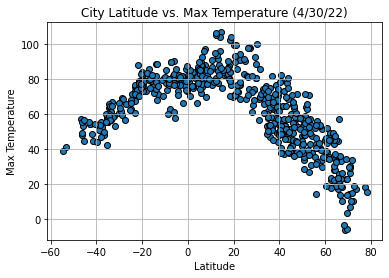

In [80]:
x = reset_df['Lat']
y= reset_df['Max Temp']

plt.scatter(x,y, edgecolor='k')


plt.title("City Latitude vs. Max Temperature (4/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig('MaxTemp.jpg')
plt.show()

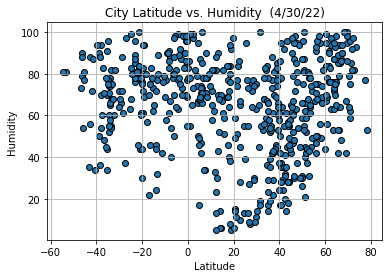

In [79]:
x = reset_df['Lat']
y= reset_df['Humidity']

plt.scatter(x,y, edgecolor='k')


plt.title("City Latitude vs. Humidity  (4/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig('humidity.jpg')
plt.show()

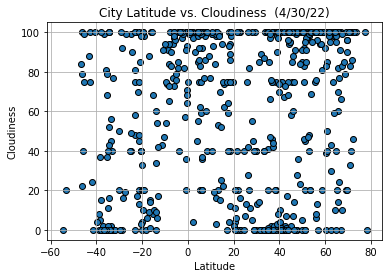

In [78]:
x = reset_df['Lat']
y= reset_df['Cloudiness']

plt.scatter(x,y, edgecolor='k')


plt.title("City Latitude vs. Cloudiness  (4/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig('cloudiness.jpg')
plt.show()

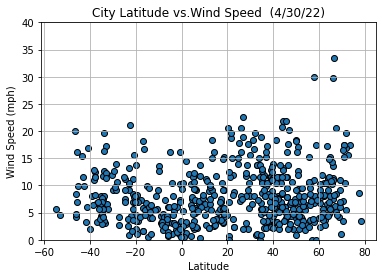

In [77]:
x = reset_df['Lat']
y= reset_df['Wind Speed']

plt.scatter(x,y, edgecolor='k')

plt.ylim(0,40)
plt.title("City Latitude vs.Wind Speed  (4/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('WindSpeed.jpg')
plt.show()

In [14]:

north = reset_df.loc[reset_df['Lat'] > 0]
south = reset_df.loc[reset_df['Lat'] < 0]


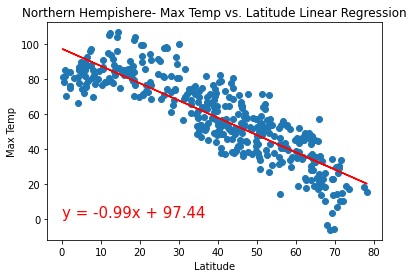

r-value is: -0.8609651516222907
y= -0.99x + 97.44


In [69]:
x = north['Lat']
y = north['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate('y = -0.99x + 97.44', xy=(0,1), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hempishere- Max Temp vs. Latitude Linear Regression')
plt.savefig('north_temp.jpg')
plt.show()

print(f'r-value is: {rvalue}')
print(equation)

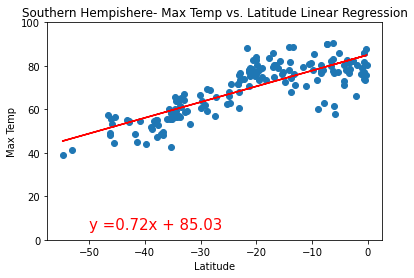

r-value is: 0.821309156004039
y= 0.72x + 85.03


In [70]:
x = south['Lat']
y = south['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(0,100)
plt.plot(x, regress, "r-")
plt.annotate('y =0.72x + 85.03 ', xy=(-50,5), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hempishere- Max Temp vs. Latitude Linear Regression')
plt.savefig('south_temp.jpg')
plt.show()
print(f'r-value is: {rvalue}')
print(equation)

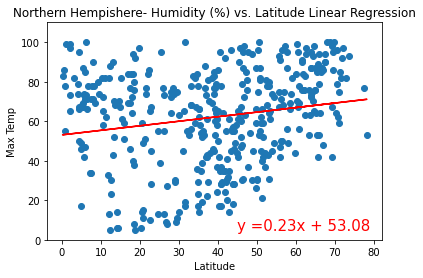

r-value is: 0.1908352751887227
y= 0.23x + 53.08


In [71]:
x = north['Lat']
y = north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(0,110)
plt.plot(x, regress, "r-")
plt.annotate('y =0.23x + 53.08 ', xy=(45,5), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hempishere- Humidity (%) vs. Latitude Linear Regression')
plt.savefig('north_humid.jpg')
plt.show()
print(f'r-value is: {rvalue}')
print(equation)

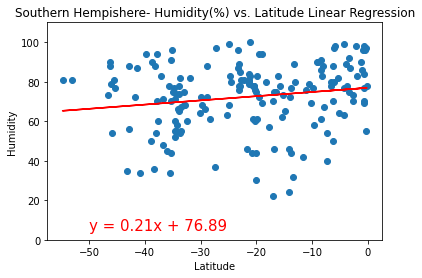

r-value is: 0.17137612903754781
y= 0.21x + 76.89


In [72]:
x = south['Lat']
y = south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(0,110)
plt.plot(x, regress, "r-")
plt.annotate('y = 0.21x + 76.89  ', xy=(-50,5), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hempishere- Humidity(%) vs. Latitude Linear Regression')
plt.savefig('south_humid.jpg')
plt.show()
print(f'r-value is: {rvalue}')
print(equation)

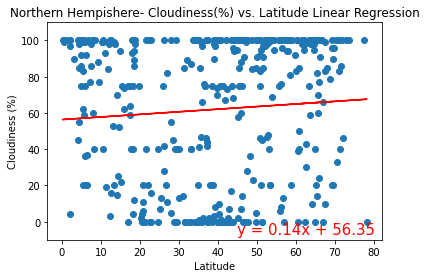

r-value is: 0.07230700257333114
y= 0.14x + 56.35


In [73]:
x = north['Lat']
y = north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(-10,110)
plt.plot(x, regress, "r-")
plt.annotate('y = 0.14x + 56.35 ', xy=(45,-7), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hempishere- Cloudiness(%) vs. Latitude Linear Regression')
plt.savefig('north_cloud.jpg')
plt.show()
print(f'r-value is: {rvalue}')
print(equation)

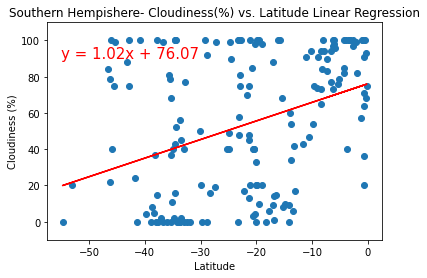

r-value is: 0.3695105764978213
y= 1.02x + 76.07


In [74]:
x = south['Lat']
y = south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(-10,110)
plt.plot(x, regress, "r-")
plt.annotate('y = 1.02x + 76.07 ', xy=(-55,90), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hempishere- Cloudiness(%) vs. Latitude Linear Regression')
plt.savefig('south_cloud.jpg')
plt.show()
print(f'r-value is: {rvalue}')
print(equation)

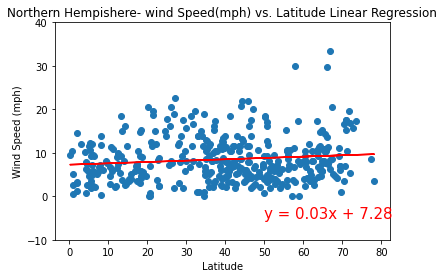

r-value is: 0.11765588617606895
y= 0.03x + 7.28


In [75]:
x = north['Lat']
y = north['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(-10,40)
plt.plot(x, regress, "r-")
plt.annotate('y = 0.03x + 7.28  ', xy=(50,-5), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hempishere- wind Speed(mph) vs. Latitude Linear Regression')
plt.savefig('north_wind.jpg')
plt.show()
print(f'r-value is: {rvalue}')
print(equation)

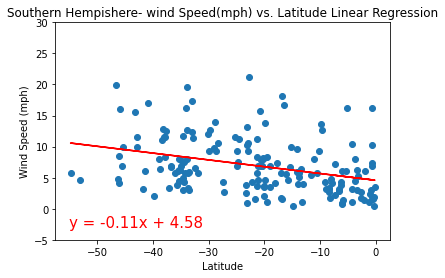

r-value is: -0.3380750486612902
y= -0.11x + 4.58


In [76]:
x = south['Lat']
y = south['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)

regress = x * slope + intercept

equation = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.ylim(-5,30)
plt.plot(x, regress, "r-")
plt.annotate('y = -0.11x + 4.58  ', xy=(-55,-3), color='red',fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hempishere- wind Speed(mph) vs. Latitude Linear Regression')
plt.savefig('south_wind.jpg')
plt.show()

print(f'r-value is: {rvalue}')
print(equation)